<a href="https://colab.research.google.com/github/CAMP-IIITB/Performance-Analyzer/blob/master/Analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from typing import Dict, Tuple, Text

import requests
import json

import matplotlib.pyplot as plt

import numpy as np

In [2]:
user = 'VastoLorde95' #@param
url = 'http://codeforces.com/api/user.status?handle=' + user + '&from=1'

response = requests.get(url=url)
response = json.loads(response.text)
submissions = response['result']

print(user, 'has made', len(submissions), 'submissions')

VastoLorde95 has made 3481 submissions


In [0]:
def get_accepted_problems_dict(submissions: Dict) -> Dict[Tuple[Text, Text], int]:
  ac_problems = {}
  ac_tags = {}
  for submission in submissions:
    if submission['verdict'] != 'OK':
      continue
    problem = submission['problem']
    if 'rating' not in problem:
      continue
    
    contest_id = problem['contestId']
    problem_index = problem['index']
    problem_rating = problem['rating']
    
    problem_id = (contest_id, problem_index)
    if problem_id in ac_problems:
      assert ac_problems[problem_id] == problem_rating
    else:
      ac_problems[(contest_id, problem_index)] = problem_rating
  return ac_problems

In [0]:
def get_ac_statistics(ac_problems: Dict[Tuple[Text, Text], int]):
  ratings = list(ac_problems.values())

  # Histogram of ratings
  fig = plt.figure()
  _ = plt.hist(ratings)
  _ = plt.xlabel('problem ratings')
  _ = plt.ylabel('frequency')
  _ = plt.title('Problem ratings.')

  # Mean and median problem rating
  mean_rating, median_rating = np.mean(ratings), np.median(ratings)
  print('Mean difficulty =', mean_rating)
  print('Median difficulty =', median_rating)

  # Top 20% hardest problems
  num_ac = len(ratings)
  top_20 = int(num_ac * 0.2 + 0.5)
  
  ratings.sort()
  hardest_20 = ratings[-top_20:]

  hard_mean_rating, hard_median_rating = np.mean(hardest_20), np.median(hardest_20)

  # Histogram of ratings of hardest 20
  fig = plt.figure()
  _ = plt.hist(hardest_20)
  _ = plt.xlabel('problem ratings')
  _ = plt.ylabel('frequency')
  _ = plt.title('Top 20% hardest problem rating.')

  print('Hard mean difficulty =', hard_mean_rating)
  print('Hard median difficulty =', hard_median_rating)

In [0]:
ac_problems = get_accepted_problems_dict(submissions)

Mean difficulty = 1763.4427684117124
Median difficulty = 1700.0
Hard mean difficulty = 2501.3333333333335
Hard median difficulty = 2500.0


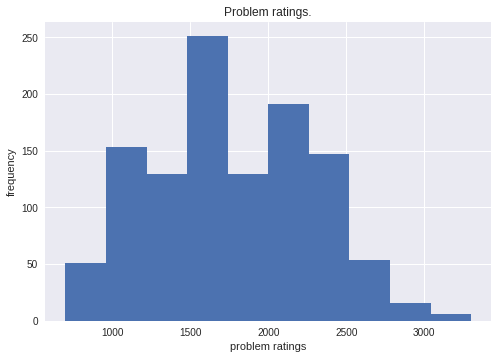

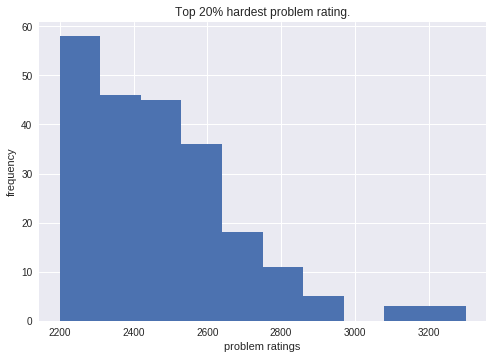

In [6]:
get_ac_statistics(ac_problems)